Import libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Newton's Method

a) Newton-Raphson method with residual convergence criteria

In [19]:
def newton_raphson_a(func,dFunc,x0,eps,maxIter=100):

    print('*** NEWTON-RAPHSON METHOD: PART A ***')
    
    # declare variables
    i = 1
    iterations = []
    residuals = []

    xNew = x0
    epsY = abs(func(xNew))
    
    while epsY > eps:
        # stop condittions
        if dFunc(x0) == 0:
            print(f'ERROR: Divide by zero')
            break
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # Newton-Raphson algorithm
        xNew = x0 - func(x0)/dFunc(x0)
        x0 = xNew

        # residual and convergence
        epsY = abs(func(xNew))

        # log values
        iterations.append(i)
        residuals.append(epsY)
        
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {iterations[-1]}')
    print(f'final residual: {residuals[-1]}\n')
        
    return xNew, iterations, residuals

b) Newton-Raphson method with convergence criteria $|x_{k+1} - x_k| > |x_k - x_{k-1}|$

In [20]:
def newton_raphson_b(func,dFunc,x0,maxIter=100):

    print('*** NEWTON-RAPHSON METHOD: PART B ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    err = 4
    errOld = 5
    
    while (err < errOld) & (err != 0.0):
        # stop condition
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # Newton-Raphson algorithm
        xNew = x0 - func(x0)/dFunc(x0)

        # error and convergence
        errOld = err
        err = abs(xNew - x0)
        epsX = abs(func(xNew)/dFunc(xNew))

        x0 = xNew

        # log values
        iterations.append(i)
        errors.append(epsX)
                
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {iterations[-2]}')
    print(f'final error: {errors[-2]}\n')
        
    return xNew, iterations, errors

Apply Newton's method to Problem 1

*** NEWTON-RAPHSON METHOD: PART A ***
final x-value: -0.45517649709361596
iterations: 4
final residual: 8.326672684688674e-17

*** NEWTON-RAPHSON METHOD: PART B ***
final x-value: -0.4551764970936159
iterations: 5
final error: 1.1696102175607384e-17



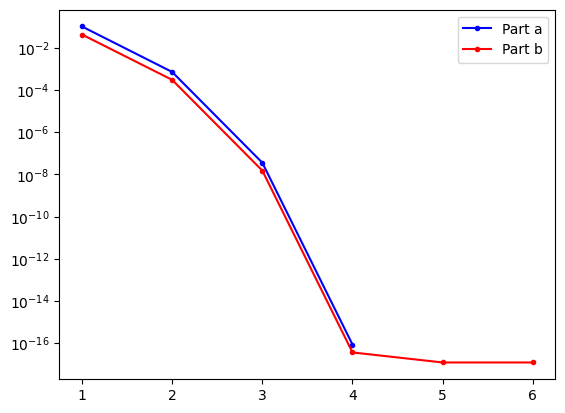

In [21]:
# given function and derivative
def f1(x):
    return np.arctan(x) + np.exp(x) - x**2

def df1(x):
    return 1 / (1 + x**2) + np.exp(x) - 2*x

def ddf1(x):
    return -2*x / (1 + x**2)**2 + np.exp(x) - 2

# compute root
x0 = 0
tol = 1e-8

_, iterations1, convCrit1 = newton_raphson_a(f1,df1,x0,tol)
_, iterations2, convCrit2  = newton_raphson_b(f1,df1,x0)

plt.semilogy(iterations1,convCrit1,'b.-',label='Part a')
plt.semilogy(iterations2,convCrit2,'r.-',label='Part b')
plt.legend()
plt.show()

c) Plot range of convergence for Newton's method

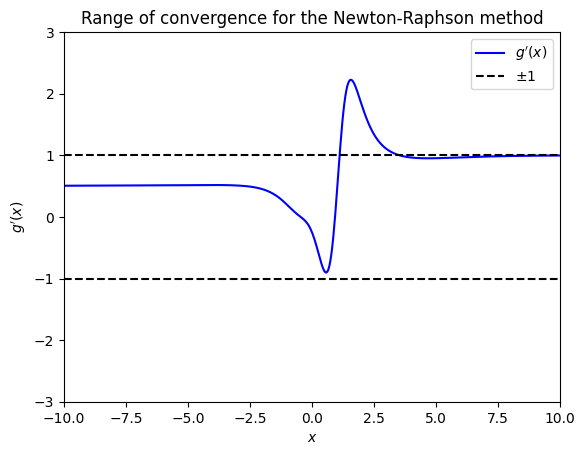

In [22]:
def dg(func,dFunc,ddFunc,x):
    return func(x)*ddFunc(x) / dFunc(x)**2

x = np.linspace(-10,10,500)

plt.plot(x,dg(f1,df1,ddf1,x),'b-',label=r'$g^\prime(x)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$\pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-10,10])
plt.ylim([-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Range of convergence for the Newton-Raphson method')
plt.legend()
plt.show()

d) Rate of convergence and asymptotic error constant

In [23]:
def convergenceRate(errors):
    e1 = errors[-3]
    e2 = errors[-2]
    e3 = errors[-1]

    num = np.log(e3) - np.log(e2)
    den = np.log(e2) - np.log(e1)

    return num/den

def errorConstant(errors,alpha):
    e1 = errors[-2]
    e2 = errors[-1]

    return e2 / e1**alpha

alpha = convergenceRate(convCrit2[:-2])
aec = errorConstant(convCrit2[:-2],alpha)

print(f'Convergence rate: {alpha}')
print(f'Asymptotic error constant: {aec}')

Convergence rate: 2.003469499970437
Asymptotic error constant: 0.16056547594126097


# 2. Error Propagation

In [24]:
# given quantities and functions
muX = 3
muY = 2
sigX = 0.02
sigY = 0.01

def z(x,y):
    return 2*x - y + np.sin(x*y**2)

def w(z):
    return np.exp(z) - 2*(z**2 - 1)

# compute mean values
muZ = z(muX,muY)
muW = w(muZ)
print(f'muZ = {muZ}')
print(f'muW = {muW} ***\n')

# partial derivatives
def dzdx(x,y):
    return 2 + y**2*np.cos(x*y**2)

def dzdy(x,y):
    return -1 + 2*x*y*np.cos(x*y**2)

def dwdz(z):
    return np.exp(z) - 4*z

# evaluate partial derivatives at mean values
print(f'dz/dx = {dzdx(muX,muY)}')
print(f'dz/dy = {dzdy(muX,muY)}')
print(f'dw/dz = {dwdz(muZ)}\n')

# compute standard deviations
sigZ = np.sqrt((dzdx(muX,muY)*sigX)**2 + (dzdy(muX,muY)*sigY)**2)
sigW = dwdz(muZ)*sigZ
print(f'sigZ = {sigZ}')
print(f'sigW = {sigW} ***')

muZ = 3.463427081999565
muW = 9.935548654592328 ***

dz/dx = 5.375415834929969
dz/dy = 9.126247504789905
dw/dz = 18.072494631250116

sigZ = 0.14102084069822707
sigW = 2.5485983864130866 ***


# 3. Gaussian Elimination

In [25]:
# A = np.array([[3,  0, -4],
#               [4,  1,  3],
#               [1, -3,  5]])

# B = np.array([-3,\
#                8,\
#                2])

A = np.array([[1 ,  4,  5],
              [5 , -2, -4],
              [-3,  1,  2]],dtype=float)

B = np.array([ 7,\
               8,\
              -6],dtype=float)

x = np.linalg.inv(A) @ B

print(f'x1 = {x[0]:0.5f}')
print(f'x2 = {x[1]:0.5f}')
print(f'x3 = {x[2]:0.5f}')

x1 = 4.00000
x2 = -8.00000
x3 = 7.00000


In [26]:
# Gauss elimination with scaled partial pivoting 
def gaussElimPivotScale(M,v):
    n = v.size

    A = np.array(M,dtype=float)
    b = np.array(v,dtype=float)
    x = np.zeros(n)

    # create scaling vector to keep track of scaling factors
    s = np.zeros(n)
    print('Original matrix:')
    print(np.vstack([A.T,b]).T,'\n')
    for i in range(n):
        s[i] = max(abs(A[i,:]))

    print(f'scaling vector = {s}\n')
    # Elimination Step
    for col in range(0,n-1):
        print(f'Iteration {col+1}')
        print('=================')
        # determine the pivot row
        i_max = np.argmax(abs(A[col:n,col])/s[col:n]) + col
        A[col:n,col:n] = (A[col:n,col:n].T/s[col:n]).T
        b[col:n] = b[col:n]/s[col:n]
        print('After scaling:')
        print(np.vstack([A.T,b]).T,'\n')
        if i_max != col:
            # swap rows i_max and col
            A[[i_max,col],:] = A[[col,i_max],:]
            b[[i_max,col]] = b[[col,i_max]]
            s[[i_max,col]] = s[[col,i_max]]
            print('After pivoting:')
            print(np.vstack([A.T,b]).T,'\n')

        # eliminate entries below the pivot
        for row in range(col+1,n):
            if A[col,col] == 0.0:
                print('ERROR: divide by zero')
                break

            m = A[row,col]/A[col,col]
            A[row,:] = A[row,:]-m*A[col,:]
            b[row] = b[row]-m*b[col]
            print('Matrix after elimination:')
            print(np.vstack([A.T,b]).T,'\n')

    # Back substitution
    x[n-1] = b[n-1]/A[n-1,n-1]
    for row in range(n-2,-1,-1):

        sum = 0
        for col in range(row+1,n):
            sum = sum + A[row,col]*x[col]

        x[row] = (b[row] - sum) / A[row,row]
        
    return x

def gauss_jordan(A, b):
    n = A.shape[0]
    Ab = np.concatenate((A, b.reshape(n, 1)), axis=1)
    print(f'Original matrix: \n{Ab}\n')

    # iterate over each column
    for col in range(n):
        print(f'Iteration {col+1}')
        print('====================')
        
        # # partial pivoting
        # pivot_row = col
        # for i in range(col + 1, n):
        #     if abs(Ab[i][col]) > abs(Ab[pivot_row][col]):
        #         pivot_row = i
        # Ab[[col, pivot_row]] = Ab[[pivot_row, col]]
        # print(f'After partial pivoting\n{Ab}\n')
        
        # divide the pivot row by the pivot
        pivot = Ab[col][col]
        Ab[col] /= pivot
        print(f'Normalize leading diagonal term\n{Ab}\n')
        
        # subtract multiples of the pivot row from all other rows
        for row in range(n):
            if row == col:
                continue
            factor = Ab[row][col]
            Ab[row] -= factor * Ab[col]
        print(f'Forward elimination\n{Ab}\n')
    
    # extract the solution vector from the augmented matrix
    x = Ab[:, n]
    
    return x

Scaled Partial Pivoting

In [27]:
# xEst = gaussElimPivotScale(A,B)
xEst = gauss_jordan(A,B)
print(xEst)

Original matrix: 
[[ 1.  4.  5.  7.]
 [ 5. -2. -4.  8.]
 [-3.  1.  2. -6.]]

Iteration 1
Normalize leading diagonal term
[[ 1.  4.  5.  7.]
 [ 5. -2. -4.  8.]
 [-3.  1.  2. -6.]]

Forward elimination
[[  1.   4.   5.   7.]
 [  0. -22. -29. -27.]
 [  0.  13.  17.  15.]]

Iteration 2
Normalize leading diagonal term
[[ 1.          4.          5.          7.        ]
 [-0.          1.          1.31818182  1.22727273]
 [ 0.         13.         17.         15.        ]]

Forward elimination
[[ 1.          0.         -0.27272727  2.09090909]
 [-0.          1.          1.31818182  1.22727273]
 [ 0.          0.         -0.13636364 -0.95454545]]

Iteration 3
Normalize leading diagonal term
[[ 1.          0.         -0.27272727  2.09090909]
 [-0.          1.          1.31818182  1.22727273]
 [-0.         -0.          1.          7.        ]]

Forward elimination
[[ 1.  0.  0.  4.]
 [ 0.  1.  0. -8.]
 [-0. -0.  1.  7.]]

[ 4. -8.  7.]


# 4. An Aerospace Application

Given information

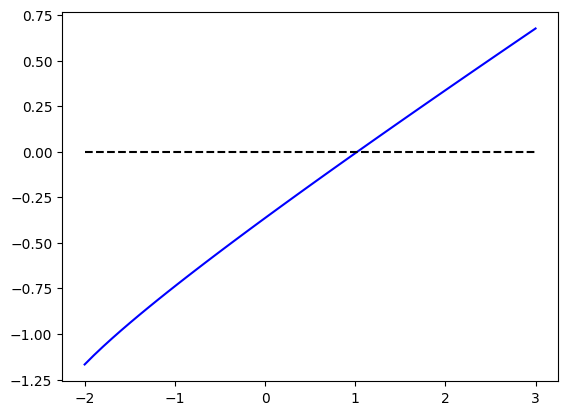

In [28]:
# pressure ratio
pRatio = 1.364

# Mach number
M = 0.78

# isentropic equation set to zero
def f4(gamma):
    return (1 + (gamma - 1)/2 * M**2)**(gamma / (gamma - 1)) - pRatio

g = np.linspace(-2,3)

plt.plot(g,f4(g),'b-')
plt.plot(g,np.zeros_like(g),'k--')
plt.show()

Newton-Raphson with finite differences

In [29]:
# finite difference step size
h = 1e-9

# derivative approximated by finite difference
def df4(x):
    return (f4(x + h) - f4(x)) / h

# initial guess and tolerance
gamma0 = 0
tol = 1e-8

# solve
_, _, _ = newton_raphson_a(f4,df4,gamma0,tol)
xNew, _, _ = newton_raphson_b(f4,df4,gamma0)
print(f'final residual: {f4(xNew)}')

*** NEWTON-RAPHSON METHOD: PART A ***
final x-value: 1.024204389493081
iterations: 3
final residual: 8.396616735240059e-12

*** NEWTON-RAPHSON METHOD: PART B ***
final x-value: 1.0242043894690351
iterations: 5
final error: 1.2710114073273808e-14

final residual: 4.440892098500626e-15


In [30]:
def regula_falsi(func,dFunc,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Regula-Falsi method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        print(xNew)

        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew
        
        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))

        # log iteration and error
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')

    return xNew, iterations, errors

*** REGULA-FALSI METHOD ***
1.0081513178279529
1.024303817483498
1.0242044116832905
final x-value: 1.0242044116832905
iterations: 3
error: 7.761663090022353e-09



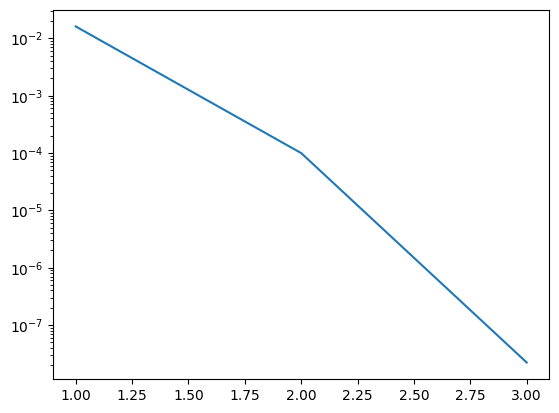

In [31]:
xNew, iterations, errors = regula_falsi(f4,df4,1.5,5,1e-5,maxIter=1e5)
plt.semilogy(iterations,errors)
plt.show()